Faire un for chaque dossier dans dossier movies (chaque genre), for chaque file dans le dossier de ce genre, readlines

In [17]:
import os

path = "./data/dialogs_movies"

for folder in os.listdir(path):
    #print(folder)
    for file in os.listdir(path+"/"+folder):
        #print(file)
        with open("../2021_22/data/dialogs_movies/" + folder + "/" + file, "r") as f :
            document = f.read()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
from pywsd import disambiguate
import pandas as pd

print(disambiguate('I went to the bank to deposit my money'))

disambiguate_dialog_df = pd.DataFrame(disambiguate('I went to the bank to deposit my money'),
                                      columns = ["Word", "Synset"])

disambiguate_dialog_df

[('I', None), ('went', Synset('run_low.v.01')), ('to', None), ('the', None), ('bank', Synset('bank.n.09')), ('to', None), ('deposit', Synset('deposit.v.02')), ('my', None), ('money', Synset('money.n.03'))]


,Word,Synset
0,I,None
1,went,Synset('run_low.v.01')
2,to,None
3,the,None
4,bank,Synset('bank.n.09')
5,to,None
6,deposit,Synset('deposit.v.02')
7,my,None
8,money,Synset('money.n.03')


In [6]:
disambiguate_dialog_df["Word"]

0          I
1       went
2         to
3        the
4       bank
5         to
6    deposit
7         my
8      money
Name: Word, dtype: object

In [18]:
import senticnet

senticnet.senticnet['money']

[0,
 0.253,
 0.091,
 0,
 '#serenity',
 '#acceptance',
 'positive',
 0.172,
 'sticker',
 'dollar_sign',
 'monetary',
 'value',
 'money_value']

In [27]:
#disambiguiate string
from pywsd import disambiguate
import pandas as pd
#search in senticnet
import senticnet

disambiguate_dialog_df = pd.DataFrame(disambiguate('abandon I went to the bank to deposit my money'),
                                      columns = ["Word", "Synset"])


for word in disambiguate_dialog_df["Word"]:
    if word in senticnet.senticnet:
        print(senticnet.senticnet[word])
    else:
        print("not found")

[-0.553, 0, -0.349, 0, '#sadness', '#disgust', 'negative', -0.451, 'uncalled_for', 'unwant', 'unfriendless', 'cast_off', 'unwelcome']
not found
not found
not found
not found
not found
not found
[-0.917, 0, -0.795, 0, '#grief', '#loathing', 'negative', -0.856, 'impudent', 'alluvial', 'brash', 'rock', 'insensitive']
not found
[0, 0.253, 0.091, 0, '#serenity', '#acceptance', 'positive', 0.172, 'sticker', 'dollar_sign', 'monetary', 'value', 'money_value']
      Word                   Synset
0  abandon  Synset('wildness.n.01')
1        I                     None
2     went   Synset('run_low.v.01')
3       to                     None
4      the                     None
5     bank      Synset('bank.n.09')
6       to                     None
7  deposit   Synset('deposit.v.02')
8       my                     None
9    money     Synset('money.n.03')


In [34]:
#disambiguiate string
from pywsd import disambiguate
import pandas as pd
#search in senticnet
import senticnet

disambiguate_dialog_df = pd.DataFrame(disambiguate('abandon I went to the bank to deposit my money'),
                                      columns = ["Word", "Synset"])

list_senticnet = []
for word in disambiguate_dialog_df["Word"]:
    if word in senticnet.senticnet:
        list_senticnet.append(senticnet.senticnet[word])
    else:
        list_senticnet.append("not found")
disambiguate_dialog_df["Senticnet"] = list_senticnet

print(disambiguate_dialog_df)

      Word                   Synset  \
0  abandon  Synset('wildness.n.01')   
1        I                     None   
2     went   Synset('run_low.v.01')   
3       to                     None   
4      the                     None   
5     bank      Synset('bank.n.09')   
6       to                     None   
7  deposit   Synset('deposit.v.02')   
8       my                     None   
9    money     Synset('money.n.03')   

                                           Senticnet  
0  [-0.553, 0, -0.349, 0, #sadness, #disgust, neg...  
1                                          not found  
2                                          not found  
3                                          not found  
4                                          not found  
5                                          not found  
6                                          not found  
7  [-0.917, 0, -0.795, 0, #grief, #loathing, nega...  
8                                          not found  
9  [0, 0.253, 0.091,

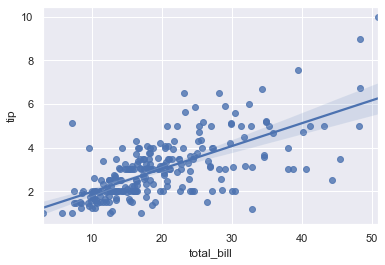

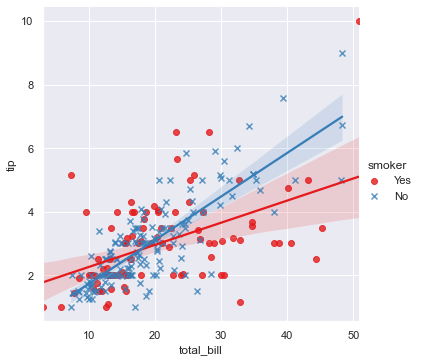

In [10]:
import seaborn as sns

sns.set_theme()

tips = sns.load_dataset("tips")

sns.regplot(
    data=tips,
    x="total_bill", y="tip"
)
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

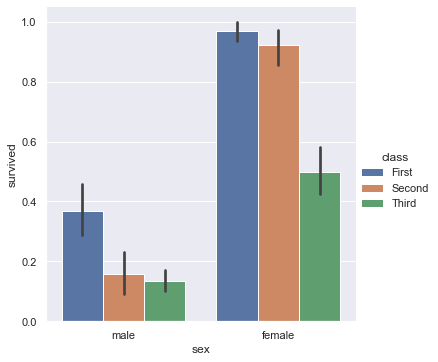

In [13]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [1]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

NameError: name 'sns' is not defined

In [8]:
from nltk.corpus import wordnet as wn

synonyms = []

for syn in wn.synsets("love"):
    for i in syn.lemmas():
        synonyms.append(l.name())

print(set(synonyms))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/Users/thomasrywalski/nltk_data'
    - '/Users/thomasrywalski/opt/anaconda3/nltk_data'
    - '/Users/thomasrywalski/opt/anaconda3/share/nltk_data'
    - '/Users/thomasrywalski/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [31]:
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
def synonym_antonym_extractor(phrase):
    mots = phrase.split(" ")
    synonyms = []

    for mot in mots:
        for syn in wordnet.synsets(mot):
            for l in syn.lemmas():
                synonyms.append(l.name())

    print(set(synonyms))

synonym_antonym_extractor(phrase="I was to the library to eat my sandwich with love")

{'sandwich'}


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thomasrywalski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
